In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from nltk.corpus import stopwords
import numpy as np
from PIL import Image

In [2]:
WCD = dict()    
def MakeCloud(text , title = 'Word Clouds' , w = 15 , h = 15):
    global WCD
    plt.figure(figsize=(w,h))
    WC = WordCloud(background_color="white",stopwords=set(stopwords.words('english'))).generate("".join([i.lower() for i in text.split()]))
    WCD = WC.words_
    plt.imshow(WC)
    plt.axis("off")
    plt.title(title)
    plt.show()    

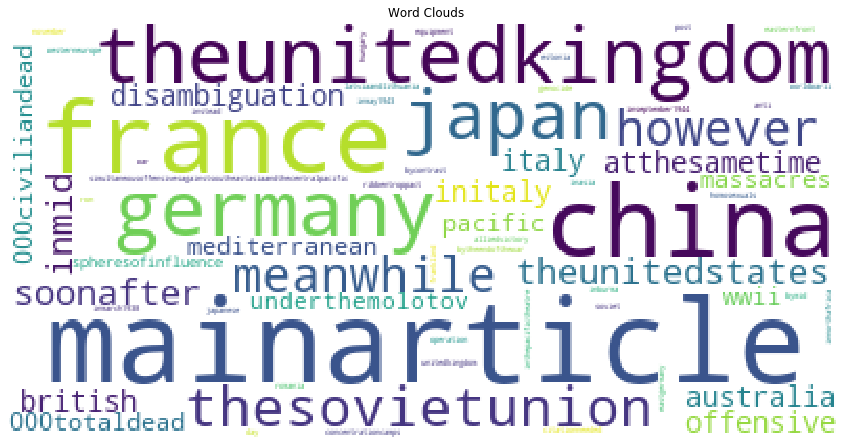

In [3]:
f = open("ww2.txt", "r",  encoding='utf-8')
Text = f.read()
MakeCloud(Text)

In [4]:
WCD

{'mainarticle': 1.0,
 'china': 0.7142857142857143,
 'france': 0.7142857142857143,
 'theunitedkingdom': 0.7142857142857143,
 'germany': 0.7142857142857143,
 'japan': 0.5714285714285714,
 'thesovietunion': 0.5714285714285714,
 'meanwhile': 0.5714285714285714,
 'however': 0.5714285714285714,
 'theunitedstates': 0.5714285714285714,
 'soonafter': 0.5714285714285714,
 'inmid': 0.5714285714285714,
 'disambiguation': 0.42857142857142855,
 'australia': 0.42857142857142855,
 'italy': 0.42857142857142855,
 'atthesametime': 0.42857142857142855,
 'british': 0.42857142857142855,
 'offensive': 0.42857142857142855,
 'initaly': 0.42857142857142855,
 'wwii': 0.2857142857142857,
 'pacific': 0.2857142857142857,
 'mediterranean': 0.2857142857142857,
 '000civiliandead': 0.2857142857142857,
 '000totaldead': 0.2857142857142857,
 'massacres': 0.2857142857142857,
 'underthemolotov': 0.2857142857142857,
 'spheresofinfluence': 0.2857142857142857,
 'simultaneousoffensivesagainstsoutheastasiaandthecentralpacific': 

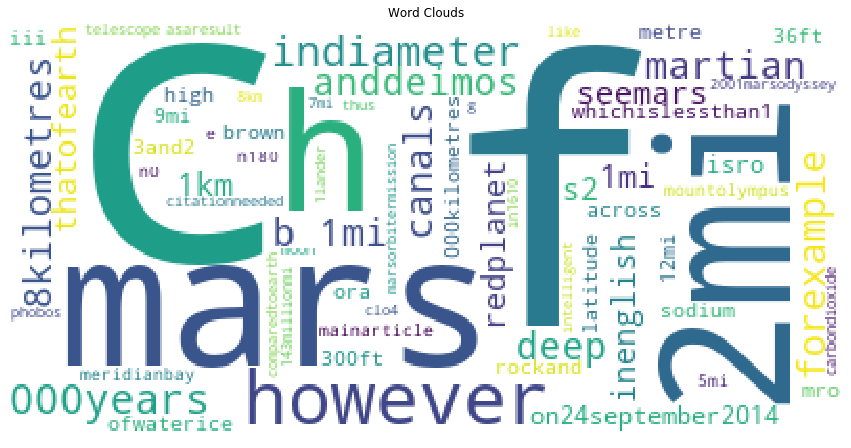

In [5]:
f = open("mars.txt", "r",  encoding='utf-8')
Text = f.read()
MakeCloud(Text)

In [6]:
Words = ['went','UK','water','tree','then','elephant','tree','then','elephant','elephant','elephant']

Words = ' '.join(Words)

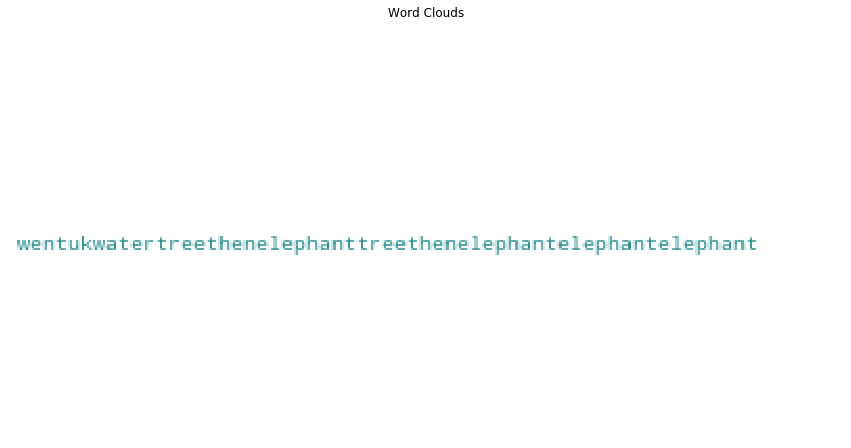

In [7]:
MakeCloud(Words)

In [8]:
# pip install python-bidi
# pip install arabic_reshaper

from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display

In [9]:
def ArabCloud(text , title = 'السحابة الكلامية' , w = 15 , h = 15):
    plt.figure(figsize=(w,h))
    text = get_display(arabic_reshaper.reshape(str(text)))
    plt.imshow(WordCloud(font_path='MBKhursheed.ttf',background_color = 'white').generate(text))
    plt.axis("off")
    plt.title(title)
    plt.show()   

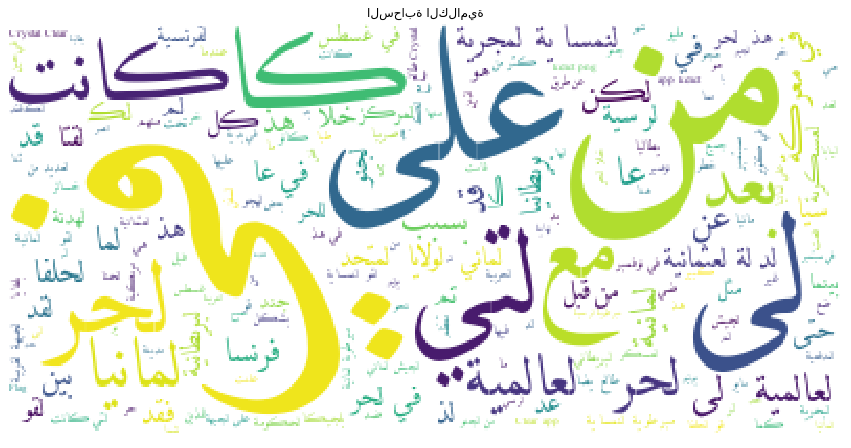

In [10]:
f = open("ww1.txt", "r",  encoding='utf-8')
Text = f.read()
ArabCloud(Text)

In [11]:
len(Text.split())

29181

In [12]:
ArabStopWords = ['من','الي','في','مع','هنا','ذلك','هؤلاء','معا','انا' ,'عن','لي','علي' ,'على']

CleanedText =  ' '.join([i for i in Text.split() if not i in ArabStopWords])


len(CleanedText.split())

26262

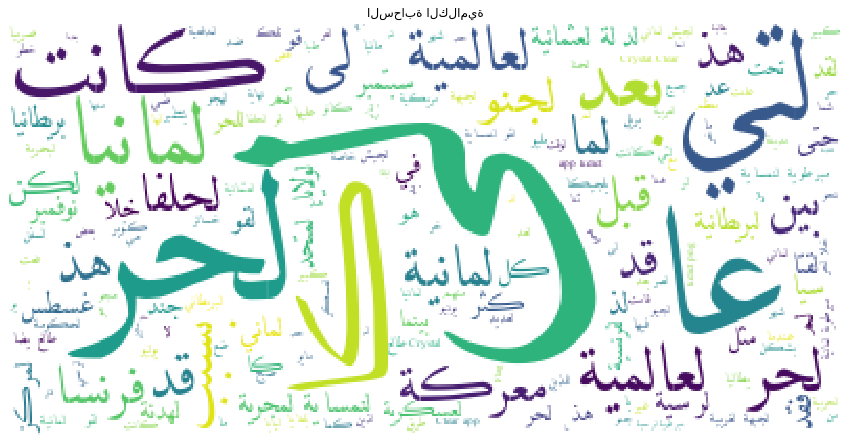

In [13]:
ArabCloud(CleanedText)

In [14]:
def MaskCloud(Text,ImagePath,SaveImage,Width) : 
    ThisMask = np.array(Image.open(ImagePath))
    ThisMask = ThisMask[:,:,0]
    def transform_format(val):
        if val == 0:
            return 255
        else:
            return val
    TransformedThisMask = np.ndarray((ThisMask.shape[0],ThisMask.shape[1]), np.int32)
    for i in range(len(ThisMask)):
        TransformedThisMask[i] = list(map(transform_format, ThisMask[i]))
    wc = WordCloud(background_color="white", max_words=1000, mask=TransformedThisMask,
                    contour_width=Width, contour_color='firebrick')
    wc.generate(Text)
    wc.to_file(SaveImage)
    plt.figure(figsize=[20,10])
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    return None

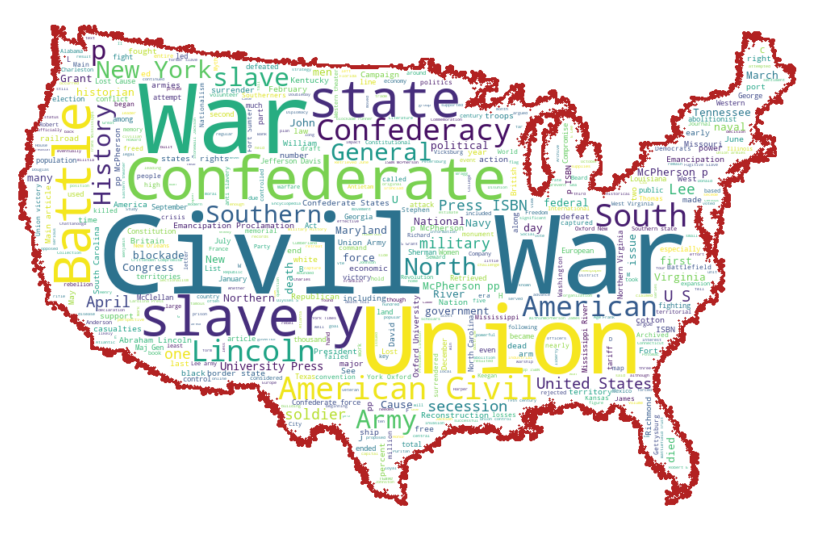

In [15]:
f = open("civil.txt", "r",  encoding='utf-8')
Text = f.read()
MaskCloud(Text,'0.jpg','Cloud Image.jpg',2)

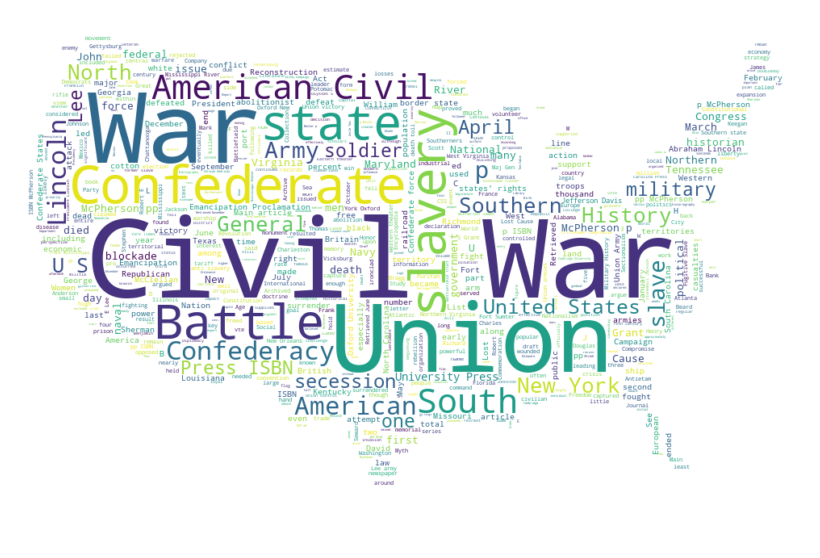

In [16]:
MaskCloud(Text,'0.jpg','Cloud Image.jpg',0)